## Stock Sentiment Analysis using News Headlines

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Data.csv to Data.csv


In [3]:
df=pd.read_csv('Data.csv', encoding = "ISO-8859-1")

In [4]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


Number of rows:  4101
Number of columns:  27


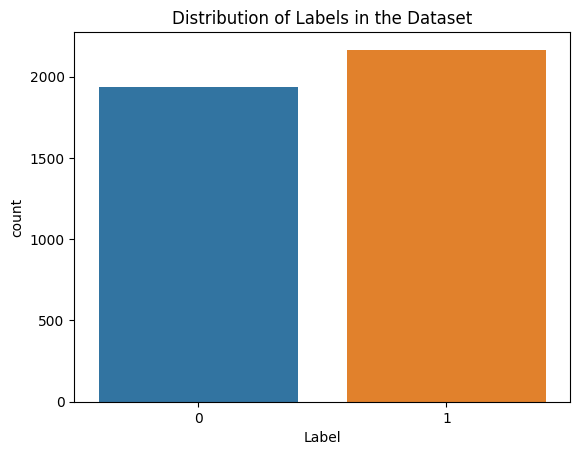

Number of missing values in the dataset:  7


In [5]:
# Check the shape of the dataset
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

# Check the distribution of labels
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels in the Dataset')
plt.show()

# Check if there are any missing values
missing_values = df.isnull().sum().sum()
print("Number of missing values in the dataset: ", missing_values)

In [6]:
# Replace missing values with an empty string
df = df.fillna('')

# Check if there are any missing values left
missing_values = df.isnull().sum().sum()
print("Number of missing values in the dataset: ", missing_values)

Number of missing values in the dataset:  0


In [7]:
# Download the necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Define the set of stopwords
stopwords_set = set(stopwords.words('english'))

# Initialize an empty list to hold the cleaned headlines
cleaned_headlines = []

# Loop over each row in the dataframe
for index, row in df.iterrows():
    # Join all the headlines into a single string
    joined_headlines = ' '.join(str(x) for x in row[2:])

    # Convert the headlines to lower case
    lower_headlines = joined_headlines.lower()

    # Split the headlines into words
    words = lower_headlines.split()

    # Remove stopwords and lemmatize the words
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_set]

    # Join the cleaned words back into a single string and add it to the list
    cleaned_headline = ' '.join(cleaned_words)
    cleaned_headlines.append(cleaned_headline)

# Replace the old headlines with the cleaned headlines in the dataframe
df['Cleaned Headlines'] = cleaned_headlines

# Display the first few rows of the dataframe
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Cleaned Headlines
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title,'hindrance operations': extract leaked report ...
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite,scorecard best lake scene leader: german sleaz...
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links,coventry caught counter flo united's rival roa...
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart,pilgrim know progress thatcher facing ban mcil...
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft,hitch horlocks beckham united survive breast c...


we move on to the feature extraction step. We will experiment with different feature extraction methods. We will start with CountVectorizer as in the original code, but we'll also try TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF is a statistic that reflects how important a word is to a document in a collection or corpus.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a new DataFrame for the features
features = df.copy()

# Split the data into training and test sets
train = features[features['Date'] < '20150101']
test = features[features['Date'] > '20141231']

# Implement BAG OF WORDS
countvector = CountVectorizer(ngram_range=(2,2))
traindataset = countvector.fit_transform(train['Cleaned Headlines'])
test_dataset = countvector.transform(test['Cleaned Headlines'])

traindataset, test_dataset


(<3975x602473 sparse matrix of type '<class 'numpy.int64'>'
 	with 792245 stored elements in Compressed Sparse Row format>,
 <378x602473 sparse matrix of type '<class 'numpy.int64'>'
 	with 91441 stored elements in Compressed Sparse Row format>)

TF-IDF (Term Frequency-Inverse Document Frequency) is another method that represents text data in terms of a matrix. However, instead of just counting the number of times each word appears in each document, it assigns a weight to each word in each document. This weight is the product of two terms: the term frequency (the count of the word in the document) and the inverse document frequency (the log of the total number of documents divided by the number of documents that contain the word). The idea is to give higher weight to words that are more unique to a document.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Implement TF-IDF
tfidfvector = TfidfVectorizer(ngram_range=(2,2))
traindataset_tfidf = tfidfvector.fit_transform(train['Cleaned Headlines'])
test_dataset_tfidf = tfidfvector.transform(test['Cleaned Headlines'])

traindataset_tfidf, test_dataset_tfidf

(<3975x602473 sparse matrix of type '<class 'numpy.float64'>'
 	with 792245 stored elements in Compressed Sparse Row format>,
 <378x602473 sparse matrix of type '<class 'numpy.float64'>'
 	with 91441 stored elements in Compressed Sparse Row format>)

Now that we've extracted features from the text, the next step is to train a machine learning model on these features. In the original code, a RandomForest Classifier was used. We'll start with that, but also consider other models for comparison.

Let's proceed with the RandomForest Classifier using the Bag of Words features. We'll train the model and then evaluate its performance on the test set. We'll use accuracy as the evaluation metric for now, but later we'll also consider other metrics like Precision, Recall, and F1-score.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200, criterion='entropy')
randomclassifier.fit(traindataset, train['Label'])

# Predict for the Test Dataset
predictions = randomclassifier.predict(test_dataset)

# Evaluation
matrix = confusion_matrix(test['Label'], predictions)
score = accuracy_score(test['Label'], predictions)
report = classification_report(test['Label'], predictions)

matrix, score, report

(array([[132,  54],
        [  3, 189]]),
 0.8492063492063492,
 '              precision    recall  f1-score   support\n\n           0       0.98      0.71      0.82       186\n           1       0.78      0.98      0.87       192\n\n    accuracy                           0.85       378\n   macro avg       0.88      0.85      0.85       378\nweighted avg       0.88      0.85      0.85       378\n')

In [11]:
# Implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200, criterion='entropy')
randomclassifier.fit(traindataset_tfidf, train['Label'])

# Predict for the Test Dataset
predictions_tfidf = randomclassifier.predict(test_dataset_tfidf)

# Evaluation
matrix_tfidf = confusion_matrix(test['Label'], predictions_tfidf)
score_tfidf = accuracy_score(test['Label'], predictions_tfidf)
report_tfidf = classification_report(test['Label'], predictions_tfidf)

matrix_tfidf, score_tfidf, report_tfidf


(array([[140,  46],
        [ 13, 179]]),
 0.843915343915344,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.83       186\n           1       0.80      0.93      0.86       192\n\n    accuracy                           0.84       378\n   macro avg       0.86      0.84      0.84       378\nweighted avg       0.85      0.84      0.84       378\n')

In [12]:
from sklearn.linear_model import LogisticRegression

# Implement Logistic Regression
logreg = LogisticRegression()
logreg.fit(traindataset, train['Label'])

# Predict for the Test Dataset
predictions_logreg = logreg.predict(test_dataset)

# Evaluation
matrix_logreg = confusion_matrix(test['Label'], predictions_logreg)
score_logreg = accuracy_score(test['Label'], predictions_logreg)
report_logreg = classification_report(test['Label'], predictions_logreg)

matrix_logreg, score_logreg, report_logreg

(array([[144,  42],
        [ 17, 175]]),
 0.843915343915344,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83       186\n           1       0.81      0.91      0.86       192\n\n    accuracy                           0.84       378\n   macro avg       0.85      0.84      0.84       378\nweighted avg       0.85      0.84      0.84       378\n')

In [13]:
# Implement Logistic Regression with TF-IDF
logreg.fit(traindataset_tfidf, train['Label'])

# Predict for the Test Dataset
predictions_logreg_tfidf = logreg.predict(test_dataset_tfidf)

# Evaluation
matrix_logreg_tfidf = confusion_matrix(test['Label'], predictions_logreg_tfidf)
score_logreg_tfidf = accuracy_score(test['Label'], predictions_logreg_tfidf)
report_logreg_tfidf = classification_report(test['Label'], predictions_logreg_tfidf)

matrix_logreg_tfidf, score_logreg_tfidf, report_logreg_tfidf


(array([[131,  55],
        [  2, 190]]),
 0.8492063492063492,
 '              precision    recall  f1-score   support\n\n           0       0.98      0.70      0.82       186\n           1       0.78      0.99      0.87       192\n\n    accuracy                           0.85       378\n   macro avg       0.88      0.85      0.85       378\nweighted avg       0.88      0.85      0.85       378\n')

In [14]:
from sklearn.naive_bayes import MultinomialNB

# Implement Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(traindataset, train['Label'])

# Predict for the Test Dataset
predictions_nb = nb.predict(test_dataset)

# Evaluation
matrix_nb = confusion_matrix(test['Label'], predictions_nb)
score_nb = accuracy_score(test['Label'], predictions_nb)
report_nb = classification_report(test['Label'], predictions_nb)

matrix_nb, score_nb, report_nb


(array([[149,  37],
        [ 21, 171]]),
 0.8465608465608465,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.80      0.84       186\n           1       0.82      0.89      0.85       192\n\n    accuracy                           0.85       378\n   macro avg       0.85      0.85      0.85       378\nweighted avg       0.85      0.85      0.85       378\n')

In [15]:
# Implement Multinomial Naive Bayes with TF-IDF
nb.fit(traindataset_tfidf, train['Label'])

# Predict for the Test Dataset
predictions_nb_tfidf = nb.predict(test_dataset_tfidf)

# Evaluation
matrix_nb_tfidf = confusion_matrix(test['Label'], predictions_nb_tfidf)
score_nb_tfidf = accuracy_score(test['Label'], predictions_nb_tfidf)
report_nb_tfidf = classification_report(test['Label'], predictions_nb_tfidf)

matrix_nb_tfidf, score_nb_tfidf, report_nb_tfidf


(array([[131,  55],
        [  0, 192]]),
 0.8544973544973545,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.70      0.83       186\n           1       0.78      1.00      0.87       192\n\n    accuracy                           0.85       378\n   macro avg       0.89      0.85      0.85       378\nweighted avg       0.89      0.85      0.85       378\n')

In [16]:
# Create a dataframe to hold the results
results = pd.DataFrame({
    'Model': ['Random Forest (BoW)', 'Random Forest (TF-IDF)', 'Logistic Regression (BoW)', 'Logistic Regression (TF-IDF)', 'Multinomial NB (BoW)', 'Multinomial NB (TF-IDF)'],
    'Accuracy': [score, score_tfidf, score_logreg, score_logreg_tfidf, score_nb, score_nb_tfidf]
})

# Display the results
results


,Model,Accuracy
0,Random Forest (BoW),0.849206
1,Random Forest (TF-IDF),0.843915
2,Logistic Regression (BoW),0.843915
3,Logistic Regression (TF-IDF),0.849206
4,Multinomial NB (BoW),0.846561
5,Multinomial NB (TF-IDF),0.854497


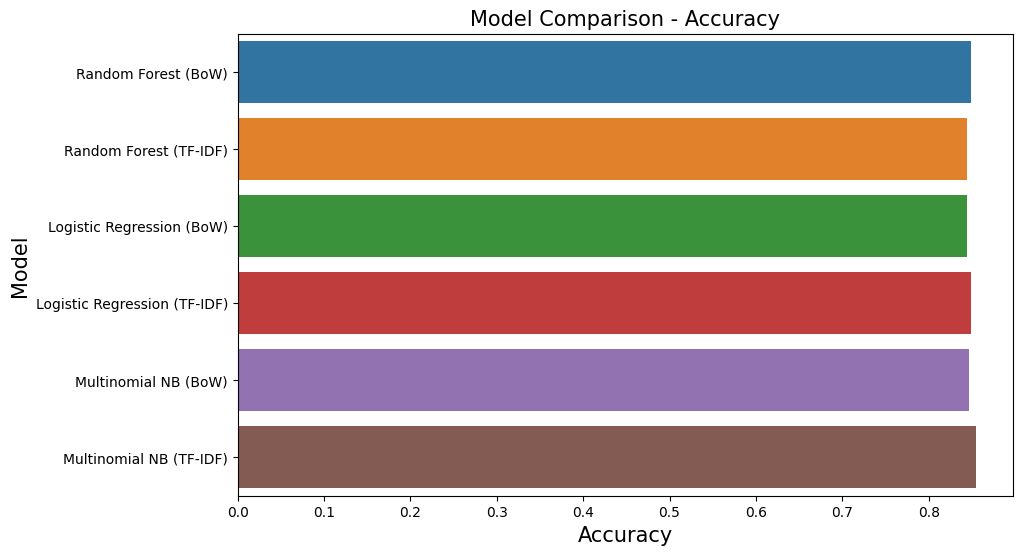

In [17]:
# Create plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results)

plt.xlabel('Accuracy', size=15)
plt.ylabel('Model', size=15)
plt.title('Model Comparison - Accuracy', size=15)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.show()


In [18]:
from sklearn.feature_selection import SelectKBest, chi2

# Define the feature selection
selector = SelectKBest(chi2, k=1000)

# Fit the feature selection
selector.fit(traindataset, train['Label'])

# Transform the datasets
traindataset_reduced = selector.transform(traindataset)
test_dataset_reduced = selector.transform(test_dataset)

traindataset_reduced.shape, test_dataset_reduced.shape


((3975, 1000), (378, 1000))

In [19]:
# Implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200, criterion='entropy')
randomclassifier.fit(traindataset_reduced, train['Label'])

# Predict for the Test Dataset
predictions_reduced = randomclassifier.predict(test_dataset_reduced)

# Evaluation
matrix_reduced = confusion_matrix(test['Label'], predictions_reduced)
score_reduced = accuracy_score(test['Label'], predictions_reduced)
report_reduced = classification_report(test['Label'], predictions_reduced)

matrix_reduced, score_reduced, report_reduced


(array([[149,  37],
        [ 22, 170]]),
 0.843915343915344,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.80      0.83       186\n           1       0.82      0.89      0.85       192\n\n    accuracy                           0.84       378\n   macro avg       0.85      0.84      0.84       378\nweighted avg       0.85      0.84      0.84       378\n')

In [20]:
# Implement Logistic Regression with reduced features
logreg.fit(traindataset_reduced, train['Label'])

# Predict for the Test Dataset
predictions_logreg_reduced = logreg.predict(test_dataset_reduced)

# Evaluation
matrix_logreg_reduced = confusion_matrix(test['Label'], predictions_logreg_reduced)
score_logreg_reduced = accuracy_score(test['Label'], predictions_logreg_reduced)
report_logreg_reduced = classification_report(test['Label'], predictions_logreg_reduced)

matrix_logreg_reduced, score_logreg_reduced, report_logreg_reduced


(array([[147,  39],
        [ 30, 162]]),
 0.8174603174603174,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.79      0.81       186\n           1       0.81      0.84      0.82       192\n\n    accuracy                           0.82       378\n   macro avg       0.82      0.82      0.82       378\nweighted avg       0.82      0.82      0.82       378\n')

In [21]:
# Implement Multinomial Naive Bayes with reduced features
nb.fit(traindataset_reduced, train['Label'])

# Predict for the Test Dataset
predictions_nb_reduced = nb.predict(test_dataset_reduced)

# Evaluation
matrix_nb_reduced = confusion_matrix(test['Label'], predictions_nb_reduced)
score_nb_reduced = accuracy_score(test['Label'], predictions_nb_reduced)
report_nb_reduced = classification_report(test['Label'], predictions_nb_reduced)

matrix_nb_reduced, score_nb_reduced, report_nb_reduced


(array([[149,  37],
        [ 32, 160]]),
 0.8174603174603174,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.80      0.81       186\n           1       0.81      0.83      0.82       192\n\n    accuracy                           0.82       378\n   macro avg       0.82      0.82      0.82       378\nweighted avg       0.82      0.82      0.82       378\n')

In [22]:
# Add the new results to the previous results dataframe
results_reduced = pd.DataFrame({
    'Model': ['Random Forest (BoW, Reduced)', 'Logistic Regression (BoW, Reduced)', 'Multinomial NB (BoW, Reduced)'],
    'Accuracy': [score_reduced, score_logreg_reduced, score_nb_reduced]
})

results_all = pd.concat([results, results_reduced], ignore_index=True)

# Display the results
results_all


,Model,Accuracy
0,Random Forest (BoW),0.849206
1,Random Forest (TF-IDF),0.843915
2,Logistic Regression (BoW),0.843915
3,Logistic Regression (TF-IDF),0.849206
4,Multinomial NB (BoW),0.846561
5,Multinomial NB (TF-IDF),0.854497
6,"Random Forest (BoW, Reduced)",0.843915
7,"Logistic Regression (BoW, Reduced)",0.817460
8,"Multinomial NB (BoW, Reduced)",0.817460


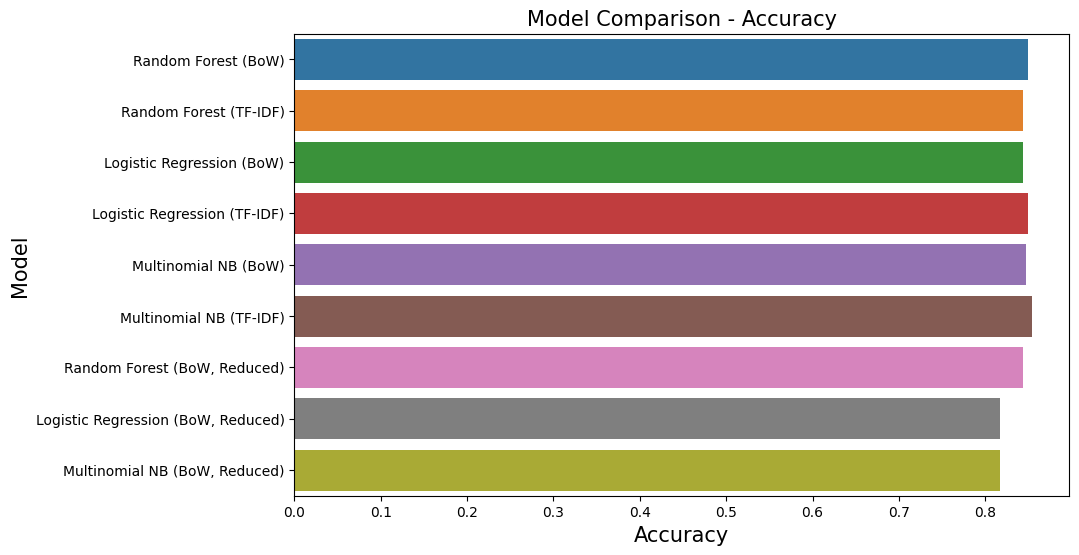

In [23]:
# Create plot for all models including the ones with reduced features
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_all)

plt.xlabel('Accuracy', size=15)
plt.ylabel('Model', size=15)
plt.title('Model Comparison - Accuracy', size=15)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.show()


Ensemble Modelling

In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Instantiate the base models
classifier1 = RandomForestClassifier(random_state=1)
classifier2 = LogisticRegression()
classifier3 = MultinomialNB()

# Define a list called base_models to store all the base models
base_models = [('RandomForest', classifier1),
               ('LogisticRegression', classifier2),
               ('MultinomialNB', classifier3)]

# Initialize the Stacking Classifier with the base models
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Fit the model to the training data
stacking_model.fit(traindataset_reduced, train['Label'])

# Evaluate the model on the test data
stacking_score = stacking_model.score(test_dataset_reduced, test['Label'])

print('Stacking Classifier Accuracy: ', stacking_score)


Stacking Classifier Accuracy:  0.8121693121693122


In [36]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for the final estimator
param_grid = {
    'final_estimator__C': [0.1, 1.0, 10.0],
    'final_estimator__penalty': ['l2', 'none']
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(traindataset_reduced, train['Label'])

# Print the best parameters and the best score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best Parameters: {'final_estimator__C': 0.1, 'final_estimator__penalty': 'none'}
Best Score: 0.7761006289308175


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [37]:
# Evaluate the model on the test data
test_score = grid_search.score(test_dataset_reduced, test['Label'])

print('Test Accuracy: ', test_score)

Test Accuracy:  0.8174603174603174


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the test data
test_preds = grid_search.predict(test_dataset_reduced)

# Print the classification report
print(classification_report(test['Label'], test_preds))

# Print the confusion matrix
print(confusion_matrix(test['Label'], test_preds))


              precision    recall  f1-score   support

           0       0.82      0.81      0.81       186
           1       0.82      0.83      0.82       192

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378

[[150  36]
 [ 33 159]]
